In [66]:
import os

import  numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from mnist_datasets import MNISTLoader

In [67]:
import os
print(os.listdir())

['.git', '.idea', '.venv', '1_Perceptron.ipynb', 'ai.png', 'ai2.png', 'BNK.ipynb', 'cardio_train.csv', 'Compressed', 'FashionMNIST.ipynb', 'GPT.ipynb', 'he.png', 'he2.jpg', 'heart.ipynb', 'How John McCarthy Sh.png', 'Image Processing.ipynb', 'main.py', 'MNISCNN.ipynb', 'mnist.npz', 'mnist_reader.py', 'README.md', 'testing.csv', 'TFkerasMINST.ipynb', 'training.csv', '__pycache__']


In [68]:
data = np.load("mnist.npz")
print(data.files)

['x_test', 'x_train', 'y_train', 'y_test']


In [69]:
x_train = data['x_train']
y_train = data['y_train']
x_test  = data['x_test']
y_test  = data['y_test']

In [70]:
np.shape(x_train)

(60000, 28, 28)

In [71]:
x_train=x_train/255
x_test=x_test/255

In [72]:
x_train[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [73]:
x_train=np.expand_dims(x_train,axis=3)

In [74]:
np.shape(x_train)

(60000, 28, 28, 1)

In [75]:
x_train[1000]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [76]:
x_test=np.expand_dims(x_test,axis=3)

In [79]:
model=Sequential([
        ZeroPadding2D(padding=(1,1),input_shape=(28,28,1)),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=(2, 2)),
    ZeroPadding2D(padding=(1,1)),
     Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax"),
])

In [80]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d_14               │ (None, 30, 30, 1)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_15               │ (None, 16, 16, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [82]:
y_train_o=to_categorical(y_train)
y_test_o=to_categorical(y_test)

In [83]:
y_train_o[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [84]:
history=model.fit(x_train,y_train_o,epochs=10,batch_size=300,validation_data=(x_test,y_test_o))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9108 - loss: 0.3094 - val_accuracy: 0.9764 - val_loss: 0.0803
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9790 - loss: 0.0685 - val_accuracy: 0.9859 - val_loss: 0.0459
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9851 - loss: 0.0476 - val_accuracy: 0.9876 - val_loss: 0.0377
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9887 - loss: 0.0363 - val_accuracy: 0.9871 - val_loss: 0.0352
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9891 - val_loss: 0.0337
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9923 - loss: 0.0251 - val_accuracy: 0.9884 - val_loss: 0.0343
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9943 - loss: 0.0196 - val_accuracy: 0.9904 - val_loss: 0.0284
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9947 - loss: 0.0169 - val

In [85]:
history

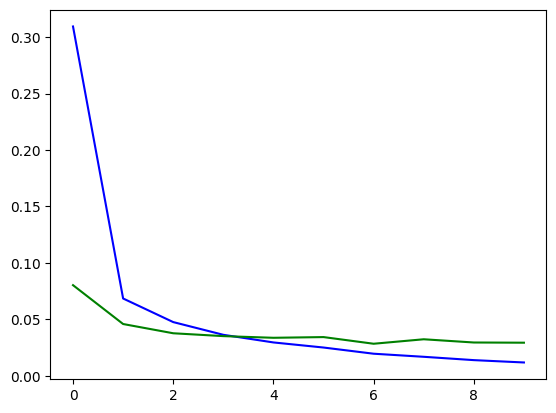

In [86]:
import  matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue',label="train data")
plt.plot(history.history['val_loss'],color='green',label="validation data")

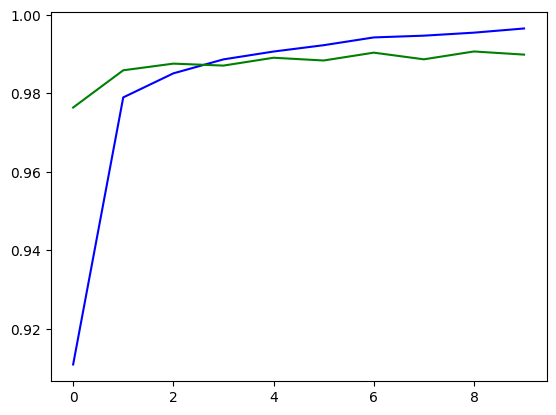

In [87]:
plt.plot(history.history['accuracy'],color='blue',label="train data")
plt.plot(history.history['val_accuracy'],color='green',label="validation data")